# MULTIPLE LINEAR REGRESSION
Assignment Task:
Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes.
Dataset Description:
The dataset consists of the following variables:
Age: Age in years
KM: Accumulated Kilometers on odometer
FuelType: Fuel Type (Petrol, Diesel, CNG)
HP: Horse Power
Automatic: Automatic ( (Yes=1, No=0)
CC: Cylinder Volume in cubic centimeters
Doors: Number of doors
Weight: Weight in Kilograms
Quarterly_Tax: 
Price: Offer Price in EUROs
Taskes:
1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.
2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).
3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.
4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.
5.Apply Lasso and Ridge methods on the model.

Interview Questions:
1.What is Normalization & Standardization and how is it helpful?
2.What techniques can be used to address multicollinearity in multiple linear regression?


Ensure to properly comment your code and provide explanations for your analysis.
Include any assumptions made during the analysis and discuss their implications.


In [1]:
#importing the libraries which are needed in this assignment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import seaborn as sns

In [2]:
#importing the data set

df=pd.read_csv('ToyotaCorolla - MLR.csv')
df.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


# 1.Performing EDA

In [3]:
df.info()  #we can see there are no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [4]:
df.isnull().sum()  # we can also check with this also

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [5]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [6]:
#finding correlation between all the variables in dataset

df.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000


In [7]:
#to identify which column is behavingas descrete when the datatype is numeric 

print(df['Age_08_04'].value_counts())
print()
print(df['KM'].value_counts())
print()
print(df['Fuel_Type'].value_counts())
print()
print(df['HP'].value_counts())
print()
print(df['Automatic'].value_counts())
print()
print(df['cc'].value_counts())
print()
print(df['Doors'].value_counts())
print()
print(df['Cylinders'].value_counts())
print()
print(df['Gears'].value_counts())
print()
print(df['Weight'].value_counts())
print()



68    69
65    63
80    59
78    47
62    42
      ..
2      2
1      2
10     1
18     1
6      1
Name: Age_08_04, Length: 77, dtype: int64

36000    9
1        8
43000    7
59000    7
75000    6
        ..
63792    1
64193    1
65170    1
65471    1
16916    1
Name: KM, Length: 1263, dtype: int64

Petrol    1264
Diesel     155
CNG         17
Name: Fuel_Type, dtype: int64

110    835
86     249
97     164
72      73
90      36
69      34
107     21
192     11
116      9
98       2
71       1
73       1
Name: HP, dtype: int64

0    1356
1      80
Name: Automatic, dtype: int64

1600     845
1300     248
1400     164
2000     119
1900      30
1800      14
1598       4
1587       4
1995       2
1398       2
1332       2
16000      1
1975       1
Name: cc, dtype: int64

5    674
3    622
4    138
2      2
Name: Doors, dtype: int64

4    1436
Name: Cylinders, dtype: int64

5    1390
6      43
3       2
4       1
Name: Gears, dtype: int64

1075    192
1050    168
1015    117
1035    106
1070

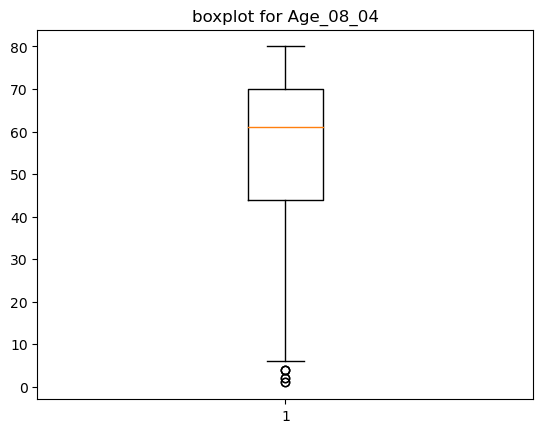

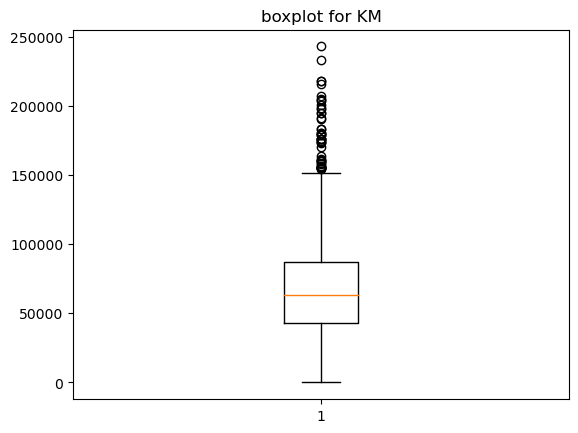

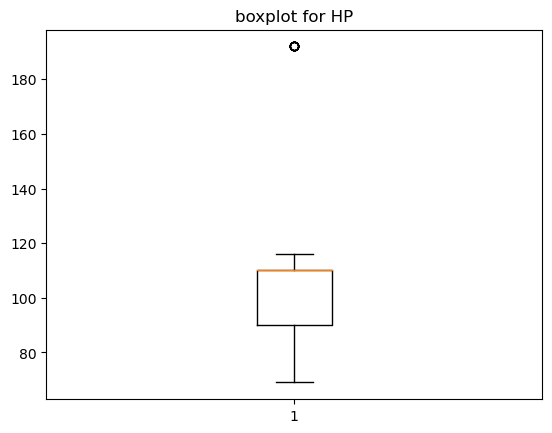

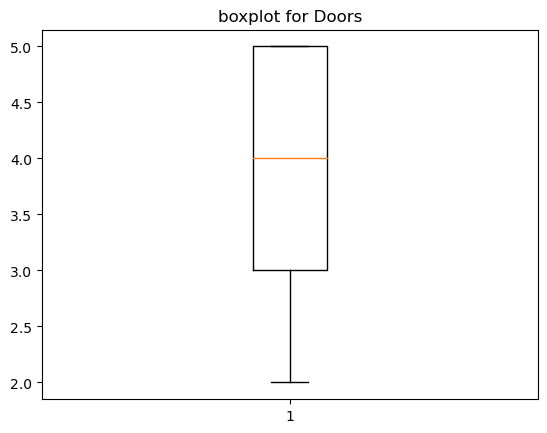

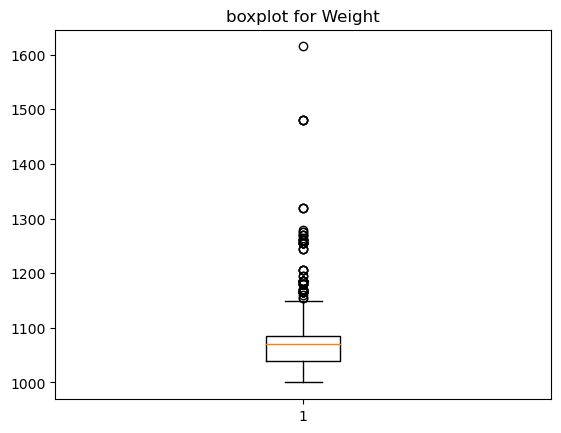

In [96]:
#checking the outlayers with the help of box plots 



plt.boxplot(df['Age_08_04'])
plt.title("boxplot for Age_08_04")
plt.show()

plt.boxplot(df['KM'])
plt.title("boxplot for KM")
plt.show()

plt.boxplot(df['HP'])
plt.title("boxplot for HP")
plt.show()



plt.boxplot(df['Doors'])
plt.title("boxplot for Doors")
plt.show()




plt.boxplot(df['Weight'])
plt.title("boxplot for Weight")
plt.show()


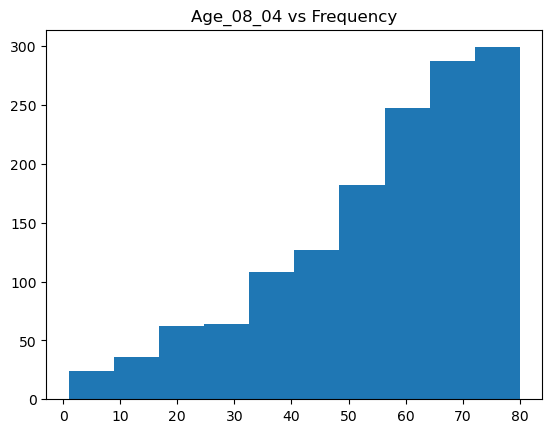

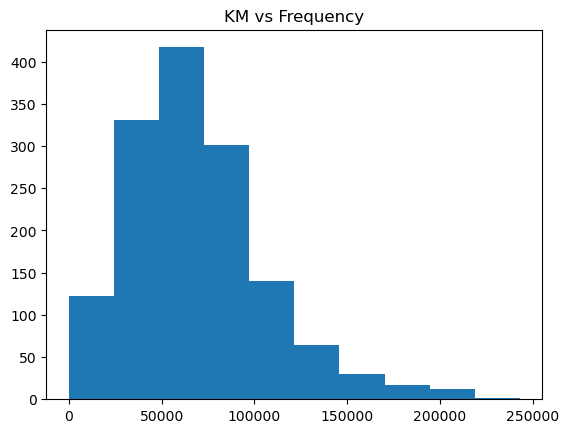

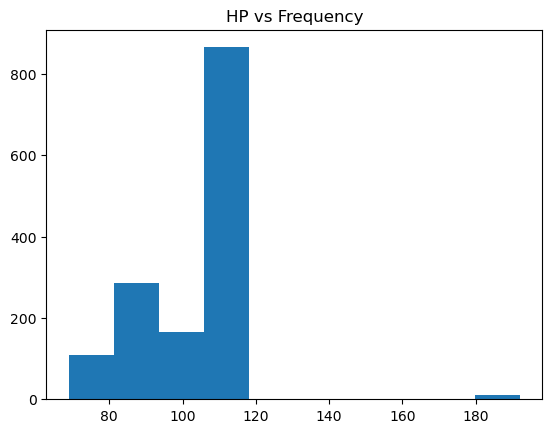

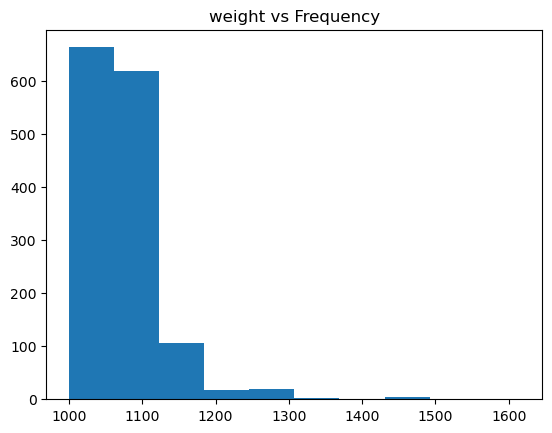

In [100]:
#creatin histograms to check the distribution of data

plt.hist(df['Age_08_04'])
plt.title('Age_08_04 vs Frequency')
plt.show()

plt.hist(df['KM'])
plt.title('KM vs Frequency')
plt.show()
plt.show()

plt.hist(df['HP'])
plt.title('HP vs Frequency')
plt.show()
plt.show()



plt.hist(df['Weight'])
plt.title('weight vs Frequency')
plt.show()
plt.show()


In [10]:
#from the above histograms we can conclude the skewness of data or we can use this 

print(df['Age_08_04'].skew())
print(df['KM'].skew())             #-0.5 to +0.5: Approximate symmetry.
print(df['HP'].skew())        #   1 to -0.5 or +0.5 to +1: Moderate skewness.
print(df['cc'].skew())    # < -1 or > +1: Substantial skewness.
print(df['Weight'].skew())
#says positively skewed there may contains outlayers

-0.82670187309842
1.0159121980877577
0.9558356472519488
27.431792795981686
3.108639394626062


In [11]:
#here we can find many outalayers tho we are not deleting because i want 
#to see there will be any difference in model prediction
#so i am not going to perform any deletion of oulayers and treating them



# Data Transformation/Preprocessing

In [12]:
from sklearn.preprocessing import StandardScaler   #importing the preprocessing library
                                                 

scaler=StandardScaler()     #assigning standard scaler to a variable
x1=df[['Age_08_04','KM','HP','cc','Weight']]   #selecting all the columns which has to transform
df1=scaler.fit_transform(x1)           #fitting the model
df1=pd.DataFrame(df1)                 #creating a dataframe 
df1

,0,1,2,3,4
0,-1.771966,-0.574695,-0.768042,0.997419,1.758561
1,-1.771966,0.117454,-0.768042,0.997419,1.758561
2,-1.718184,-0.715386,-0.768042,0.997419,1.758561
3,-1.610620,-0.547650,-0.768042,0.997419,1.758561
4,-1.395491,-0.801028,-0.768042,0.997419,1.853577
...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.652594,-0.901883
1432,0.863362,-1.321120,-1.035138,-0.652594,-1.091915
1433,0.809579,-1.374036,-1.035138,-0.652594,-1.091915
1434,0.755797,-1.376703,-1.035138,-0.652594,-1.091915


In [13]:
df1.columns=['Age_08_04','KM','HP','cc','Weight']
df1

,Age_08_04,KM,HP,cc,Weight
0,-1.771966,-0.574695,-0.768042,0.997419,1.758561
1,-1.771966,0.117454,-0.768042,0.997419,1.758561
2,-1.718184,-0.715386,-0.768042,0.997419,1.758561
3,-1.610620,-0.547650,-0.768042,0.997419,1.758561
4,-1.395491,-0.801028,-0.768042,0.997419,1.853577
...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.652594,-0.901883
1432,0.863362,-1.321120,-1.035138,-0.652594,-1.091915
1433,0.809579,-1.374036,-1.035138,-0.652594,-1.091915
1434,0.755797,-1.376703,-1.035138,-0.652594,-1.091915


In [14]:
#label encoding 

from sklearn.preprocessing import LabelEncoder  #importing label encoder

label=LabelEncoder()

df2=label.fit_transform(df['Fuel_Type'])    #fitting the model and transforming
df2=pd.DataFrame(df2)                       #creating a data frame
df2.columns=['Fuel_Type']                   #giving a column name
df2

,Fuel_Type
0,1
1,1
2,1
3,1
4,1
...,...
1431,2
1432,2
1433,2
1434,2


In [15]:
#Binary column  Automatic storing in df3
df3=df['Automatic']
df3=pd.DataFrame(df3)
df3.columns=['Automatic']
df3

,Automatic
0,0
1,0
2,0
3,0
4,0
...,...
1431,0
1432,0
1433,0
1434,0


In [16]:
#delete columns={Cylinder}  because no corr and same vales in all rows best to delete

df4=df['Cylinders']
df4.drop(columns=['Cylinders'], inplace=True)  #no need of deleting because 
                                                #we dont concat in new dataset after tranformed

In [17]:
#not to standardize or encode because they are behaving as label encoded
df5=df[['Doors','Gears']]
df5

,Doors,Gears
0,3,5
1,3,5
2,3,5
3,3,5
4,3,5
...,...,...
1431,3,5
1432,3,5
1433,3,5
1434,3,5


In [18]:
#creating datasets for different models we can use only one dataset but i am using different

df6=df['Price']

df_new=pd.concat([df1,df2,df3,df5,df6],axis=1)
df_new  #for model 1

df_new1=df_new
df_new1   #for model 2

df_new2=df_new
df_new2    #for model 3

,Age_08_04,KM,HP,cc,Weight,Fuel_Type,Automatic,Doors,Gears,Price
0,-1.771966,-0.574695,-0.768042,0.997419,1.758561,1,0,3,5,13500
1,-1.771966,0.117454,-0.768042,0.997419,1.758561,1,0,3,5,13750
2,-1.718184,-0.715386,-0.768042,0.997419,1.758561,1,0,3,5,13950
3,-1.610620,-0.547650,-0.768042,0.997419,1.758561,1,0,3,5,14950
4,-1.395491,-0.801028,-0.768042,0.997419,1.853577,1,0,3,5,13750
...,...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.652594,-0.901883,2,0,3,5,7500
1432,0.863362,-1.321120,-1.035138,-0.652594,-1.091915,2,0,3,5,10845
1433,0.809579,-1.374036,-1.035138,-0.652594,-1.091915,2,0,3,5,8500
1434,0.755797,-1.376703,-1.035138,-0.652594,-1.091915,2,0,3,5,7250


In [19]:
#finding the correlation

df.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000


In [20]:
#from the above observation we can conclude that the correlation between 
#price and age is more so we can conclude thar it is best for the first model

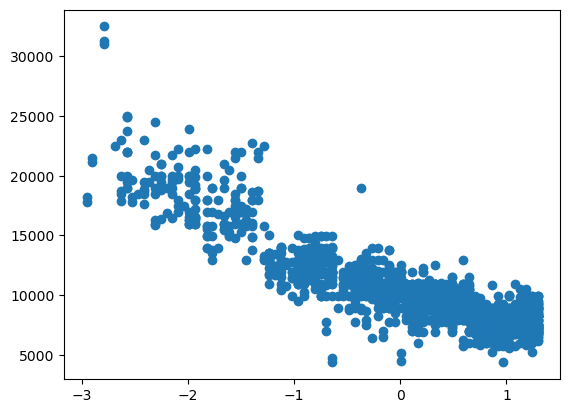

In [21]:
#creating a scatter plot between age and price to checking the relationship

plt.scatter(x=df_new['Age_08_04'],y=df['Price'])


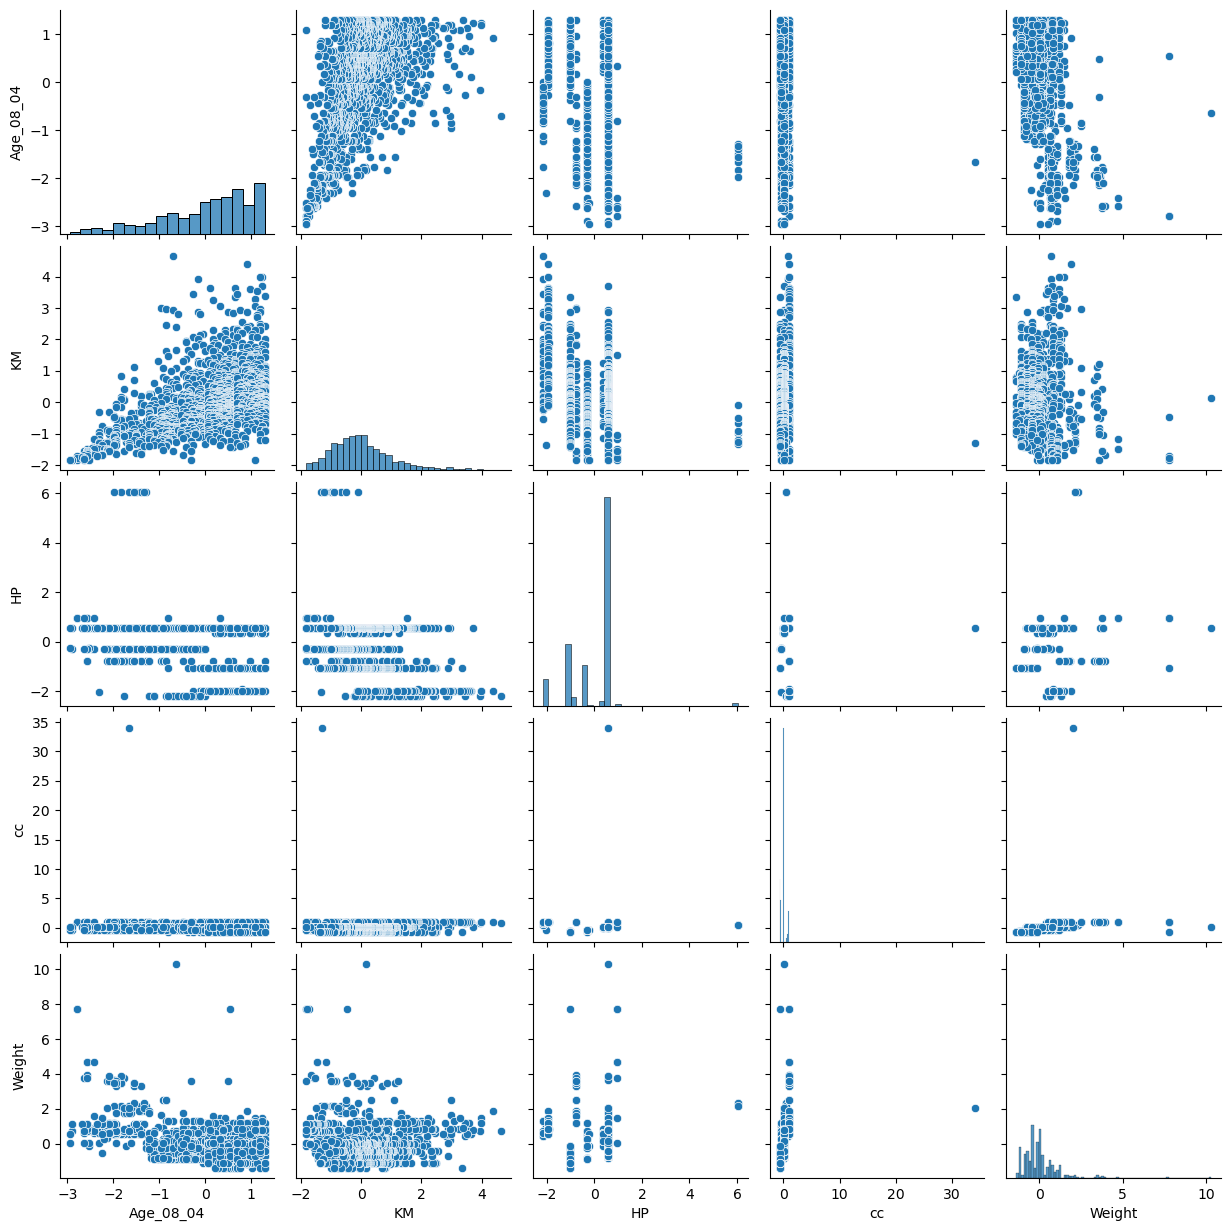

In [22]:
#we can create a scatter plot for hole dataset using pairplot
sns.pairplot(df1)

In [23]:
#see what are the columns names

df_new.columns

Index(['Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Fuel_Type', 'Automatic',
       'Doors', 'Gears', 'Price'],
      dtype='object')

# 2.Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [24]:
from sklearn.model_selection import train_test_split

y=df['Price']           #Dependent variable
x=df_new['Age_08_04']   #for independent variable
x=pd.DataFrame(x)   

In [25]:
#Dividing them into train and test

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20 ,random_state=30)
                                            #test_size=0.20 means 20% for test and 80% for train
                                            #random_state helps if both are doing the same project this helps to get the same values for train and test

In [26]:
#checking the size of train and test data
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((1148, 1), (288, 1), (1148,), (288,))

# 3.Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models

In [27]:
#from above coorelatin matrices we decided to make a model between Age and price
#dividing them into train and test

from sklearn.model_selection import train_test_split

y=df['Price']           #Dependent variable
x=df_new['Age_08_04']   #for independent variable
x=pd.DataFrame(x)       #creating a dataframe




In [28]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((1148, 1), (288, 1), (1148,), (288,))

In [29]:
#applying the linear regression model

model=LinearRegression()      #creating the instance

model.fit(xtrain,ytrain)      #fitting a model 

y_pred_train = model.predict(xtrain) # bo + b1x1
y_pred_test = model.predict(xtest) # bo + b1x1



In [30]:
ytest.shape

(288,)

In [31]:
y_pred_test.shape

(288,)

In [32]:
#in training and testing we creating a two dimension array and store the 
#columns in 2d array  after training and testing if we want to see the result
# in a form of dataset/dataframe  we want to change the 2d array into 2d array and create dataframe

xtrain = np.array(xtrain).ravel()  #flattens a multi dimentional array into one dimension array
ytrain = np.array(ytrain).ravel()  #.ravel converts 2d arry to 1d array
xtest = np.array(xtest).ravel()
ytest = np.array(ytest).ravel()

In [33]:
train_df = pd.DataFrame({  #creating a dataframe for trained data
    'X_train': xtrain,
    'Y_train': ytrain
})

test_df = pd.DataFrame({  #creating a dataframe for tested data
    'X_test': xtest,
    'Y_test': ytest
})

train_df.columns=['Age_08_04_train','Price_train']
test_df.columns=['Age_08_04_test','Price_test']

In [34]:
train_df
test_df

,Age_08_04_test,Price_test
0,0.325540,9950
1,1.239837,7950
2,0.540668,8250
3,-0.803887,11950
4,0.863362,6500
...,...,...
283,-1.933313,17950
284,0.433104,8750
285,0.325540,8750
286,1.239837,7500


# other method to test the model 

In [35]:
df_new

,Age_08_04,KM,HP,cc,Weight,Fuel_Type,Automatic,Doors,Gears,Price
0,-1.771966,-0.574695,-0.768042,0.997419,1.758561,1,0,3,5,13500
1,-1.771966,0.117454,-0.768042,0.997419,1.758561,1,0,3,5,13750
2,-1.718184,-0.715386,-0.768042,0.997419,1.758561,1,0,3,5,13950
3,-1.610620,-0.547650,-0.768042,0.997419,1.758561,1,0,3,5,14950
4,-1.395491,-0.801028,-0.768042,0.997419,1.853577,1,0,3,5,13750
...,...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.652594,-0.901883,2,0,3,5,7500
1432,0.863362,-1.321120,-1.035138,-0.652594,-1.091915,2,0,3,5,10845
1433,0.809579,-1.374036,-1.035138,-0.652594,-1.091915,2,0,3,5,8500
1434,0.755797,-1.376703,-1.035138,-0.652594,-1.091915,2,0,3,5,7250


In [36]:
import statsmodels.formula.api as smf
model=smf.ols('Price_train~Age_08_04_train',data=train_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            Price_train   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     3899.
Date:                Sat, 26 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:09:27   Log-Likelihood:                -10175.
No. Observations:                1148   AIC:                         2.035e+04
Df Residuals:                    1146   BIC:                         2.036e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.074e+04     50.528    212.476      0.000    1.06e+04    1.08e+04
Age_08_04_train -3171.9962     50.798    -62.443      0.000   -3271.664   -3072.328
==============================================================================
Omnibus:                      250.245   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1897.001
Skew:                           0.790   Prob(JB):                         0.00
Kurtosis:                       9.096   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
model.params    #gives the intercept value  and coefficeint valueof x variable  

Intercept          10736.023278
Age_08_04_train    -3171.996235
dtype: float64

In [38]:
#from the above results we can conslude that the model is performing good 

In [39]:
print("r squared value of the trained model=",model.rsquared)

vif=1/(1-model.rsquared)           #which is used to vheck wheter the model is excellent,good,or worst
print()
print("variance influencing factor=",vif) #if vif<5 excellent,vif>5-10 moderate,vif>10 not to be condsider
print()

if vif<5:
    print("Model is excellent")
elif vif>5 and vif<10:
    print("Model is performing good and we can consider")
else:
    print("model is worst")

r squared value of the trained model= 0.7728499490750637

variance influencing factor= 4.402376296761028

Model is excellent


In [40]:
#same model for test data  from statsmodel.formula.api as smf
model1=smf.ols('Price_test~Age_08_04_test',data=test_df).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Price_test   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     868.8
Date:                Sat, 26 Apr 2025   Prob (F-statistic):           1.14e-88
Time:                        10:09:27   Log-Likelihood:                -2579.1
No. Observations:                 288   AIC:                             5162.
Df Residuals:                     286   BIC:                             5170.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       1.071e+04    110.890     96.588      0.000    1.05e+04    1.09e+04
Age_08_04_test -3201.5419    108.617    -29.475      0.000   -3415.333   -2987.751
==============================================================================
Omnibus:                      111.790   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              767.697
Skew:                           1.404   Prob(JB):                    1.98e-167
Kurtosis:                      10.489   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
model1.params   #gives the intercept value  and coefficeint value of x variable


Intercept         10710.583013
Age_08_04_test    -3201.541909
dtype: float64

In [42]:
print("r squared value of the trained model=",model1.rsquared)

vif=1/(1-model1.rsquared)           #which is used to vheck wheter the model is excellent,good,or worst
print()
print("variance influencing factor=",vif) #if vif<5 excellent,vif>5-10 moderate,vif>10 not to be condsider
print()

if vif<5:
    print("Model is excellent")
elif vif>5 and vif<10:
    print("Model is performing good and we can consider")
else:
    print("model is worst")

r squared value of the trained model= 0.7523377271186155

variance influencing factor= 4.0377566932810165

Model is excellent


# 3.2==> with 2 independent variables 2nd model

In [43]:
df_new1=df_new
df_new1   #for model 2


,Age_08_04,KM,HP,cc,Weight,Fuel_Type,Automatic,Doors,Gears,Price
0,-1.771966,-0.574695,-0.768042,0.997419,1.758561,1,0,3,5,13500
1,-1.771966,0.117454,-0.768042,0.997419,1.758561,1,0,3,5,13750
2,-1.718184,-0.715386,-0.768042,0.997419,1.758561,1,0,3,5,13950
3,-1.610620,-0.547650,-0.768042,0.997419,1.758561,1,0,3,5,14950
4,-1.395491,-0.801028,-0.768042,0.997419,1.853577,1,0,3,5,13750
...,...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.652594,-0.901883,2,0,3,5,7500
1432,0.863362,-1.321120,-1.035138,-0.652594,-1.091915,2,0,3,5,10845
1433,0.809579,-1.374036,-1.035138,-0.652594,-1.091915,2,0,3,5,8500
1434,0.755797,-1.376703,-1.035138,-0.652594,-1.091915,2,0,3,5,7250


In [44]:
#checking the colleration for selecting the next indepentent

df.corr()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.033081,0.126389,0.185326,NaN,0.063104,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,0.031717,-0.098084,-0.148359,NaN,-0.005364,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,-0.081854,0.102683,-0.036197,NaN,0.015023,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.013144,0.035856,0.092424,NaN,0.209477,0.089614
Automatic,0.033081,0.031717,-0.081854,0.013144,1.000000,0.066740,-0.027654,NaN,-0.098555,0.057249
cc,0.126389,-0.098084,0.102683,0.035856,0.066740,1.000000,0.079903,NaN,0.014629,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,-0.027654,0.079903,1.000000,NaN,-0.160141,0.302618
Cylinders,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gears,0.063104,-0.005364,0.015023,0.209477,-0.098555,0.014629,-0.160141,NaN,1.000000,0.020613
Weight,0.581198,-0.470253,-0.028598,0.089614,0.057249,0.335637,0.302618,NaN,0.020613,1.000000


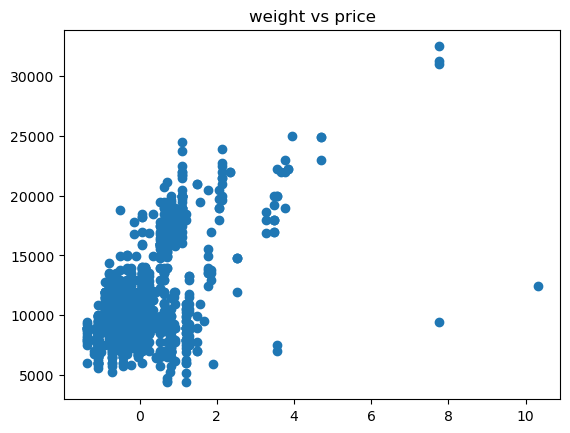

In [45]:
#checking the relationship between weight and price for model selection

plt.scatter(x=df_new1["Weight"],y=df['Price'])
plt.title("weight vs price")
print()



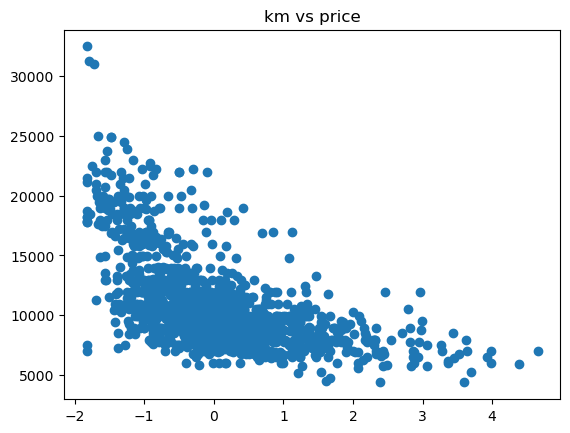

In [46]:
plt.scatter(x=df_new1["KM"],y=df['Price'])
plt.title("km vs price")
print()


In [47]:
#from the above observation the Weight is having 2nd higest correlation with price

x2=df_new1[['Age_08_04','Weight']]  #independent variable
y2=df['Price']                      #dependent variable

model2=LinearRegression()    

x2train2,x2test2,y2train2,y2test2=train_test_split(x2,y2,test_size=0.20,random_state=30)

In [48]:
x2

,Age_08_04,Weight
0,-1.771966,1.758561
1,-1.771966,1.758561
2,-1.718184,1.758561
3,-1.610620,1.758561
4,-1.395491,1.853577
...,...,...
1431,0.702015,-0.901883
1432,0.863362,-1.091915
1433,0.809579,-1.091915
1434,0.755797,-1.091915


In [49]:
x2train2.shape,x2test2.shape,y2train2.shape,y2test2.shape

((1148, 2), (288, 2), (1148,), (288,))

In [50]:
model2.fit(x2train2,y2train2)  #fitting the model

LinearRegression()

In [51]:
y2_pred_train2=model2.predict(x2train2)  #with training variables
y2_pred_test2=model2.predict(x2test2)   #with testing variables


In [52]:
x2train2.shape,x2test2.shape,y2train2.shape,y2test2.shape

((1148, 2), (288, 2), (1148,), (288,))

In [53]:
#x2train = np.array(x2train).flatten()  #remove singleton dimension but onl
#x2test = np.array(x2test).squeeze()    #work when there are such dimensions
#y2train = np.array(y2train).squeeze()
#y2test = np.array(y2test).squeeze()

In [54]:
x2train2.shape  #by apply flatten/ravel the rows are getting concatinating with one another

(1148, 2)

In [55]:
Age_08_04=x2train2.iloc[:,0]  #other technique we are storing the all rows and 1 columns in age 
Weight=x2train2.iloc[:,1]    #and all rows and 2nd column in weight 


In [56]:
Age_08_04

217    -0.803887
1147    1.024708
657     0.164193
405    -0.104718
249    -0.750104
          ...   
919     0.325540
1164    0.917144
500    -0.266065
941     0.271757
421    -0.158500
Name: Age_08_04, Length: 1148, dtype: float64

In [57]:
x2_train2=pd.DataFrame({'Age_08_04':Age_08_04,
                       'Weight':Weight}) #creating a dataframe with two columns

In [58]:
x2_train2

,Age_08_04,Weight
217,-0.803887,-0.901883
1147,1.024708,0.238307
657,0.164193,-0.616836
405,-0.104718,0.048275
249,-0.750104,0.048275
...,...,...
919,0.325540,0.048275
1164,0.917144,0.238307
500,-0.266065,0.143291
941,0.271757,-0.331788


In [59]:
#creating the same data frame for x2test 
Age_08_04=x2test2.iloc[:,0]
Weight=x2test2.iloc[:,1]

x2_test2=pd.DataFrame({'Age_08_04':Age_08_04,
                     'Weight':Weight})
x2_test2

#creating a adatframe for ytest values 

y2_test2=pd.DataFrame({'Price':y2test2})
y2_test2
#dropping the index for y2_test
y2_test2.reset_index(drop=True)

,Price
0,9950
1,7950
2,8250
3,11950
4,6500
...,...
283,17950
284,8750
285,8750
286,7500


In [60]:
y2train2.shape

(1148,)

In [61]:

y2_train2=pd.DataFrame({'Price':y2train2,  #creating a dataframe for ytarin values 
                      })
y2_train2.reset_index(drop=True)  #droping the index

,Price
0,10950
1,8450
2,8250
3,9950
4,11750
...,...
1143,9900
1144,8950
1145,9700
1146,9250


In [62]:
df_new1=pd.concat([df_new,df['Price']],axis=1)

In [63]:
df_new1.corr()

,Age_08_04,KM,HP,cc,Weight,Fuel_Type,Automatic,Doors,Gears,Price,Price
Age_08_04,1.000000,0.505672,-0.156622,-0.098084,-0.470253,0.080261,0.031717,-0.148359,-0.005364,-0.876590,-0.876590
KM,0.505672,1.000000,-0.333538,0.102683,-0.028598,-0.420586,-0.081854,-0.036197,0.015023,-0.569960,-0.569960
HP,-0.156622,-0.333538,1.000000,0.035856,0.089614,0.409476,0.013144,0.092424,0.209477,0.314990,0.314990
cc,-0.098084,0.102683,0.035856,1.000000,0.335637,-0.277239,0.066740,0.079903,0.014629,0.126389,0.126389
Weight,-0.470253,-0.028598,0.089614,0.335637,1.000000,-0.505303,0.057249,0.302618,0.020613,0.581198,0.581198
Fuel_Type,0.080261,-0.420586,0.409476,-0.277239,-0.505303,1.000000,0.069718,-0.026935,0.069655,-0.022157,-0.022157
Automatic,0.031717,-0.081854,0.013144,0.066740,0.057249,0.069718,1.000000,-0.027654,-0.098555,0.033081,0.033081
Doors,-0.148359,-0.036197,0.092424,0.079903,0.302618,-0.026935,-0.027654,1.000000,-0.160141,0.185326,0.185326
Gears,-0.005364,0.015023,0.209477,0.014629,0.020613,0.069655,-0.098555,-0.160141,1.000000,0.063104,0.063104
Price,-0.876590,-0.569960,0.314990,0.126389,0.581198,-0.022157,0.033081,0.185326,0.063104,1.000000,1.000000


In [64]:
df_new2

,Age_08_04,KM,HP,cc,Weight,Fuel_Type,Automatic,Doors,Gears,Price
0,-1.771966,-0.574695,-0.768042,0.997419,1.758561,1,0,3,5,13500
1,-1.771966,0.117454,-0.768042,0.997419,1.758561,1,0,3,5,13750
2,-1.718184,-0.715386,-0.768042,0.997419,1.758561,1,0,3,5,13950
3,-1.610620,-0.547650,-0.768042,0.997419,1.758561,1,0,3,5,14950
4,-1.395491,-0.801028,-0.768042,0.997419,1.853577,1,0,3,5,13750
...,...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.652594,-0.901883,2,0,3,5,7500
1432,0.863362,-1.321120,-1.035138,-0.652594,-1.091915,2,0,3,5,10845
1433,0.809579,-1.374036,-1.035138,-0.652594,-1.091915,2,0,3,5,8500
1434,0.755797,-1.376703,-1.035138,-0.652594,-1.091915,2,0,3,5,7250


In [65]:
model21=smf.ols('Price ~ Age_08_04+Weight',data=df_new2).fit()
model21.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                     2959.
Date:                Sat, 26 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:09:29   Log-Likelihood:                -12633.
No. Observations:                1436   AIC:                         2.527e+04
Df Residuals:                    1433   BIC:                         2.529e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.073e+04     42.287    253.762      0.000    1.06e+04    1.08e+04
Age_08_04  -2808.3474     47.916    -58.610      0.000   -2902.340   -2714.355
Weight       786.6146     47.916     16.417      0.000     692.623     880.607
==============================================================================
Omnibus:                      150.983   Durbin-Watson:                   1.234
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              949.444
Skew:                          -0.249   Prob(JB):                    6.77e-207
Kurtosis:                       6.952   Cond. No.                         1.67
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
model21.rsquared

0.8050715736932419

In [67]:
vif=1/(1-model21.rsquared)
print("model2 vif=",vif)

print("the vif values is close 5 we can say that model is performing best")

model2 vif= 5.13008809924061
the vif values is close 5 we can say that model is performing best


# Model3 with three independent variables

In [68]:
x3=df_new1[['Age_08_04','Weight','KM']]  #independent vraibles with higest correlation
y3=df_new1['Price']


In [69]:
x3train3,x3test3,y3train3,y3test3=train_test_split(x3,y3,test_size=0.20,random_state=30)


In [70]:
x3train3.shape,x3test3.shape,y3train3.shape,y3test3.shape

((1148, 3), (288, 3), (1148, 2), (288, 2))

In [71]:
model3=LinearRegression()   #fittig a linear regression model
model3.fit(x3train3,y3train3)

LinearRegression()

In [72]:
y3_pred_train3=model3.predict(x3train3)   #predicting on train

y3_pred_test3=model3.predict(x3test3)      #predicting on test

In [73]:
#ols model for trained data
model31=smf.ols(formula='Price ~ Age_08_04+Weight+KM',data=df_new2).fit()
model31.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     2665.
Date:                Sat, 26 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:09:29   Log-Likelihood:                -12454.
No. Observations:                1436   AIC:                         2.492e+04
Df Residuals:                    1432   BIC:                         2.494e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.073e+04     37.342    287.369      0.000    1.07e+04    1.08e+04
Age_08_04  -2235.3337     50.987    -43.841      0.000   -2335.350   -2135.317
Weight      1030.1460     44.006     23.409      0.000     943.824    1116.468
KM          -906.6988     45.016    -20.142      0.000    -995.003    -818.395
==============================================================================
Omnibus:                      221.061   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2197.082
Skew:                          -0.373   Prob(JB):                         0.00
Kurtosis:                       9.013   Cond. No.                         2.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
model31.rsquared   #measur to check the accuracy

0.848104243893788

In [75]:
model.resid  #y-ypredicted error

0      -2335.948709
1        964.347566
2      -1965.203622
3      -1118.188369
4      -1365.351760
           ...     
1143     196.587226
1144    1123.153668
1145   -1879.979216
1146    -624.009724
1147   -2288.785318
Length: 1148, dtype: float64

In [76]:
df_new312=pd.DataFrame(x3test3)
df_new322=pd.DataFrame(y3test3)
dfnew32=pd.concat([df_new312,df_new322],axis=1)
dfnew32


,Age_08_04,Weight,KM,Price,Price
879,0.325540,-0.711851,-0.176118,9950,9950
1085,1.239837,1.283482,1.679409,7950,7950
1002,0.540668,-0.426804,-0.783852,8250,8250
325,-0.803887,0.048275,-0.921049,11950,11950
1125,0.863362,-1.091915,1.122884,6500,6500
...,...,...,...,...,...
87,-1.933313,3.278815,-0.041801,17950,17950
690,0.433104,-1.376963,0.793680,8750,8750
755,0.325540,-1.091915,0.312902,8750,8750
1392,1.239837,-0.711851,-0.498922,7500,7500


In [77]:
#ols model for testing data
model32=smf.ols(formula='Price ~ Age_08_04+Weight+KM',data=df_new).fit()
model32.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     2665.
Date:                Sat, 26 Apr 2025   Prob (F-statistic):               0.00
Time:                        10:09:29   Log-Likelihood:                -12454.
No. Observations:                1436   AIC:                         2.492e+04
Df Residuals:                    1432   BIC:                         2.494e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.073e+04     37.342    287.369      0.000    1.07e+04    1.08e+04
Age_08_04  -2235.3337     50.987    -43.841      0.000   -2335.350   -2135.317
Weight      1030.1460     44.006     23.409      0.000     943.824    1116.468
KM          -906.6988     45.016    -20.142      0.000    -995.003    -818.395
==============================================================================
Omnibus:                      221.061   Durbin-Watson:                   1.523
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2197.082
Skew:                          -0.373   Prob(JB):                         0.00
Kurtosis:                       9.013   Cond. No.                         2.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
model32.rsquared   #for rsquare value


0.848104243893788

In [79]:
model32.resid #y-ypredicted error

0      -3524.410447
1      -2646.840055
2      -3081.754062
3      -1689.225468
4      -2735.958524
           ...     
1431   -1893.034572
1432    1971.050989
1433    -542.149055
1434   -1914.788518
1435   -3840.543506
Length: 1436, dtype: float64

In [80]:
#we can conclude that model is performing best on training data and testing data

In [81]:
print("model1 rsquared=",model1.rsquared)  #comparing the results of 
print("model2 rsquared=",model21.rsquared)   #3 modles 
print("model3 rsquared=",model31.rsquared)

model1 rsquared= 0.7523377271186155
model2 rsquared= 0.8050715736932419
model3 rsquared= 0.848104243893788


# 4.Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

In [82]:
from sklearn.metrics import root_mean_squared_error,mean_squared_error,r2_score

mse=mean_squared_error(ytrain,y_pred_train)   #checking mean squared error for train
print("mean squared error for train for model 1      ",mse)
print()

rmse=root_mean_squared_error(ytrain,y_pred_train) # i am not able import  root mean squared error so i am using squared=false which calculate the rmse value 
print("root mean squared error for train for model 1 ",rmse)
print()




r2score=r2_score(ytrain,y_pred_train)
print("r square value for train for model 1=         ",r2score)  #checking r2 value  for train
print()

print("****---------------------------------------------------------------*******")
print()

mse=mean_squared_error(ytest,y_pred_test) 
print("mean squared error for train for model 1      =",mse)     #checking mean squared error for test
print()


rmse=root_mean_squared_error(ytest,y_pred_test) # i am not able import  root mean squared error so i am using squared=false which calculate the rmse value 
print("root mean squared error for train for model 1 =",rmse)
print()




r2score=r2_score(ytest,y_pred_test)
print("r square value for train for model 1          =",r2score)      #checking r2 value for test




mean squared error for train for model 1       2925801.2205445915

root mean squared error for train for model 1  1710.497360578084

r square value for train for model 1=          0.7728499490750637

****---------------------------------------------------------------*******

mean squared error for train for model 1      = 3517495.2660522326

root mean squared error for train for model 1 = 1875.498671301111

r square value for train for model 1          = 0.752226322025983


In [83]:
rmse2=root_mean_squared_error(y2train2,y2_pred_train2)
print('root mean squared error for train for model 2 =',rmse2)

r2score2=r2_score(y2train2,y2_pred_train2)
print("r squared value for trainfor model 2          =",r2score2)
print("****-------------------------------------------------------------------************")
print()
rmse2=root_mean_squared_error(y2test2,y2_pred_test2)
print('root mean squared error for test for model 2  =',rmse2)

r2score2=r2_score(y2test2,y2_pred_test2)
print("r squared value for test for model 2          =",r2score2)
print()
print()

print("hence we can see model is performing best on traing and testing data")

root mean squared error for train for model 2 = 1585.4061041689652
r squared value for trainfor model 2          = 0.8048587539698326
****-------------------------------------------------------------------************

root mean squared error for test for model 2  = 1664.614696636
r squared value for test for model 2          = 0.8048138062085066


hence we can see model is performing best on traing and testing data


In [84]:
rmse3=root_mean_squared_error(y3train3,y3_pred_train3)
print("root mean squared errorfor trained datafor model=",rmse3)

r2score3=r2_score(y3train3,y3_pred_train3)
print("r squared value for trained data for model 3    =",r2score3)
print()

print("*****------------------------------------------------------***************")

print()
rmse31=root_mean_squared_error(y3test3,y3_pred_test3)
print("root mean squared errorfor testing data for model3=",rmse31)

r2score31=r2_score(y3test3,y3_pred_test3)
print("r squared value for testing data for model 3     =",r2score31)

root mean squared errorfor trained datafor model= 1385.5603903844792
r squared value for trained data for model 3    = 0.8509544751372289

*****------------------------------------------------------***************

root mean squared errorfor testing data for model3= 1522.2678891534115
r squared value for testing data for model 3     = 0.8367685574016457


# 5.Apply Lasso and Ridge methods on the model.

In [85]:
#
#we are doing a regression problem so we are using lasso else we use L1
from sklearn.linear_model import Lasso  
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,root_mean_squared_error
from sklearn.model_selection import cross_val_score   #for cross validation

In [86]:
x=df_new.iloc[:,0:9]    #independent variables
y=df_new['Price']       #dependent variables
x

,Age_08_04,KM,HP,cc,Weight,Fuel_Type,Automatic,Doors,Gears
0,-1.771966,-0.574695,-0.768042,0.997419,1.758561,1,0,3,5
1,-1.771966,0.117454,-0.768042,0.997419,1.758561,1,0,3,5
2,-1.718184,-0.715386,-0.768042,0.997419,1.758561,1,0,3,5
3,-1.610620,-0.547650,-0.768042,0.997419,1.758561,1,0,3,5
4,-1.395491,-0.801028,-0.768042,0.997419,1.853577,1,0,3,5
...,...,...,...,...,...,...,...,...,...
1431,0.702015,-1.279939,-1.035138,-0.652594,-0.901883,2,0,3,5
1432,0.863362,-1.321120,-1.035138,-0.652594,-1.091915,2,0,3,5
1433,0.809579,-1.374036,-1.035138,-0.652594,-1.091915,2,0,3,5
1434,0.755797,-1.376703,-1.035138,-0.652594,-1.091915,2,0,3,5


In [87]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=37)

In [88]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((1005, 9), (431, 9), (1005,), (431,))

In [89]:
#fitting the model with linear regression
model=LinearRegression()

model.fit(xtrain,ytrain)   #fitting the model

y_pred_train=model.predict(xtrain)
y_pred_test=model.predict(xtest)

rmse=root_mean_squared_error(ytrain,y_pred_train)
r2score=r2_score(ytrain,y_pred_train)

print("root mean squared error",rmse)
print("r2 on train data",r2score)
print()

rmse1=root_mean_squared_error(ytest,y_pred_test)
r2score1=r2_score(ytest,y_pred_test)
print("root mean squared error on test data",rmse1)
print("r2 on test data",r2score1)
print()


root mean squared error 1363.196107160933
r2 on train data 0.8634971659755165

root mean squared error on test data 1274.883133325668
r2 on test data 0.864912042355421



In [90]:
model.coef_

array([-2345.85818875,  -632.54273987,   372.00251913,    -9.85755888,
        1036.51442858,   297.91406103,   518.76756062,    -6.88131038,
         483.54348668])

In [91]:
#Applying the Lasso regulazition

from sklearn.linear_model import Lasso

lasso=Lasso(alpha=0.1) #this is the lambda value which used be choosen after experimenting
lasso.fit(xtrain,ytrain)
lasso.coef_
coef=pd.DataFrame(lasso.coef_)

d1 = pd.Series(['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Gears', 'Weight'])
dfcoef=pd.concat([d1,coef],axis=1)
dfcoef

#-----------------------------------------------------------------------
#Lets change the alpha values
lasso=Lasso(alpha=1) #this is the lambda value which used be choosen after experimenting
lasso.fit(xtrain,ytrain)

coef2=pd.DataFrame(lasso.coef_)


dfcoef=pd.concat([d1,coef,coef2],axis=1)
dfcoef

#-----------------------------------------------------------------------
#Lets change the alpha values
lasso=Lasso(alpha=5) #this is the lambda value which used be choosen after experimenting
lasso.fit(xtrain,ytrain)

coef3=pd.DataFrame(lasso.coef_)


dfcoef=pd.concat([d1,coef,coef2,coef3],axis=1)
dfcoef

#-----------------------------------------------------------------------
#Lets change the alpha values
lasso=Lasso(alpha=8) #this is the lambda value which used be choosen after experimenting
lasso.fit(xtrain,ytrain)

coef4=pd.DataFrame(lasso.coef_)


dfcoef=pd.concat([d1,coef,coef2,coef3,coef4],axis=1)
dfcoef

#-----------------------------------------------------------------------
#Lets change the alpha values
lasso=Lasso(alpha=12) #this is the lambda value which used be choosen after experimenting
lasso.fit(xtrain,ytrain)

coef5=pd.DataFrame(lasso.coef_)


dfcoef=pd.concat([d1,coef,coef2,coef3,coef4,coef5],axis=1)
dfcoef



,0,0,0,0,0,0
0,Age_08_04,-2345.738449,-2344.680755,-2339.348655,-2335.354820,-2330.078460
1,KM,-632.685693,-633.983091,-640.146798,-644.767783,-650.723202
2,Fuel_Type,372.221270,374.232058,383.193261,389.916808,399.241148
3,HP,-9.751873,-8.794395,-4.631706,-1.508730,-0.000000
4,Automatic,1036.213577,1033.441805,1021.280295,1012.153957,1000.622107
5,cc,296.582576,284.460985,230.149656,189.409757,133.772824
6,Doors,516.808265,499.205839,420.817597,362.029464,284.913075
7,Gears,-6.824442,-6.302637,-3.929794,-2.149839,-0.000000
8,Weight,480.699273,455.080682,341.312288,255.984029,141.914110


In [92]:
#select the only columns which are non zero values in lasso  best 3
#randomly if we know the best lambda/alpha i am randomly picking any three

x1=df_new[['Age_08_04','Fuel_Type','Weight']]
y1=df_new['Price']

x1train,x1test,y1train,y1test=train_test_split(x1,y1,test_size=0.30,random_state=37)

In [93]:
#fitting the model with linear regression  after lasso columns selction
model=LinearRegression()

model.fit(x1train,y1train)   #fitting the model

y_pred_train1=model.predict(x1train)
y_pred_test1=model.predict(x1test)

rmse=root_mean_squared_error(y1train,y_pred_train1)
r2score=r2_score(y1train,y_pred_train1)

print("root mean squared error",rmse)
print("r2 on train data",r2score)
print()

rmse1=root_mean_squared_error(y1test,y_pred_test1)
r2score1=r2_score(y1test,y_pred_test1)
print("root mean squared error on test data",rmse1)
print("r2 on test data",r2score1)
print()


root mean squared error 1491.000251962241
r2 on train data 0.8367021648199252

root mean squared error on test data 1417.283393825589
r2 on test data 0.8330489011044163



# Ridge

In [94]:
from sklearn.linear_model import Ridge

x=df_new.iloc[:,0:9]    #independent variables
y=df_new['Price']       #dependent variables

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=37)


ridge=Ridge(alpha=1)

ridge.fit(xtrain,ytrain)

coef=pd.DataFrame(ridge.coef_)
d1=pd.Series(['Age_08_04', 'KM', 'Fuel_Type', 'HP', 'Automatic', 'cc',
       'Doors', 'Gears', 'Weight'])

dfcoef=pd.concat([d1,coef],axis=1)
dfcoef


#-----------------------------------------------------------------

ridge=Ridge(alpha=12)

ridge.fit(xtrain,ytrain)

coef2=pd.DataFrame(ridge.coef_)

dfcoef=pd.concat([d1,coef,coef2],axis=1)
dfcoef

,0,0,0
0,Age_08_04,-2342.439877,-2306.787683
1,KM,-634.335186,-652.191708
2,Fuel_Type,373.121492,382.242857
3,HP,-9.556058,-6.495068
4,Automatic,1036.114813,1031.864489
5,cc,292.324692,239.549389
6,Doors,507.660078,410.698337
7,Gears,-7.022831,-6.744719
8,Weight,469.712120,358.515493


# Interview Questions:
1.What is Normalization & Standardization and how is it helpful?
2.What techniques can be used to address multicollinearity in multiple linear regression?